# Task 1st : Exploratory Data Analysis on Retail Data Set 

In [3]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv("D:\\1st INTERNSHIP(technest)\\retail_sales_dataset.csv")

# Preview data
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
# Check data types and missing values
df.info()
df.isnull().sum()

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract Month and Year
df['Month'] = df['Date'].dt.to_period('M')

# Ensure Total Amount is correctly calculated
df['Total Amount'] = df['Quantity'] * df['Price per Unit']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
# Total Sales
total_sales = df['Total Amount'].sum()
print(f"✅ Total Sales: ₹{total_sales:,.2f}")

# Revenue per Category
category_revenue = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print("\n✅ Revenue per Category:")
print(category_revenue)

# Average Order Value
average_order_value = df['Total Amount'].mean()
print(f"\n✅ Average Order Value: ₹{average_order_value:.2f}")

✅ Total Sales: ₹456,000.00

✅ Revenue per Category:
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64

✅ Average Order Value: ₹456.00


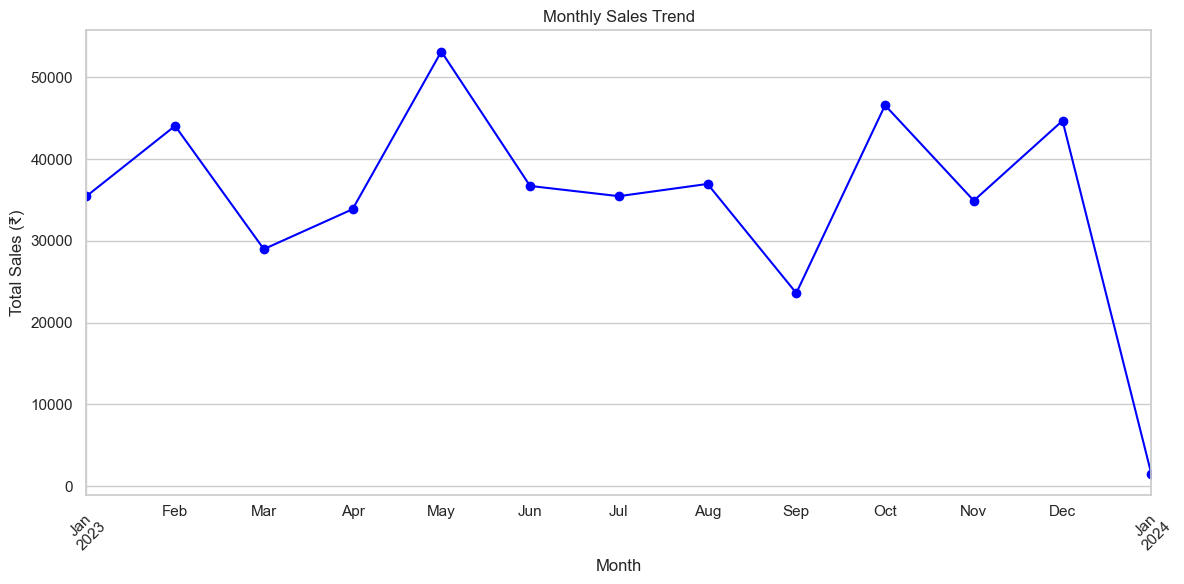

In [6]:
# Monthly Sales Trend
monthly_sales = df.groupby('Month')['Total Amount'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o', color='blue')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (₹)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_17048\201394098.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="viridis")


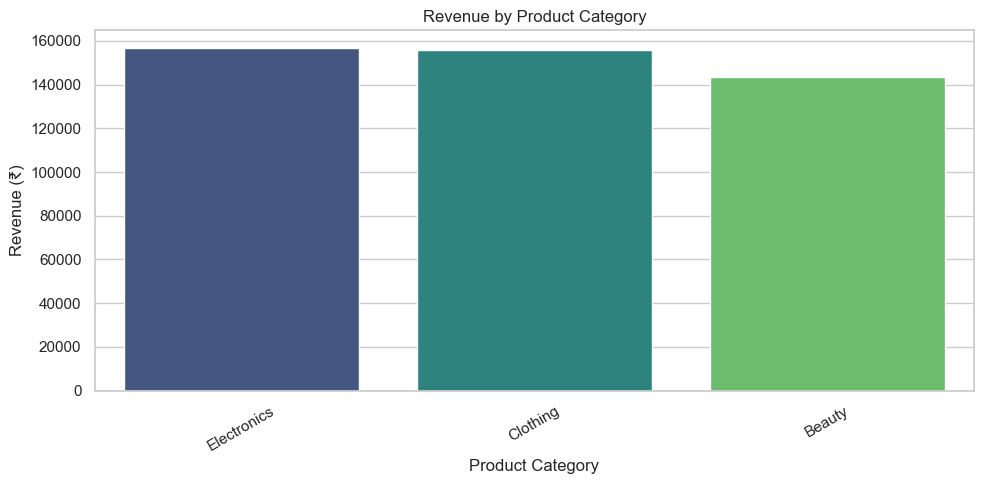

In [7]:
plt.figure(figsize=(10,5))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="viridis")
plt.title("Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Revenue (₹)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

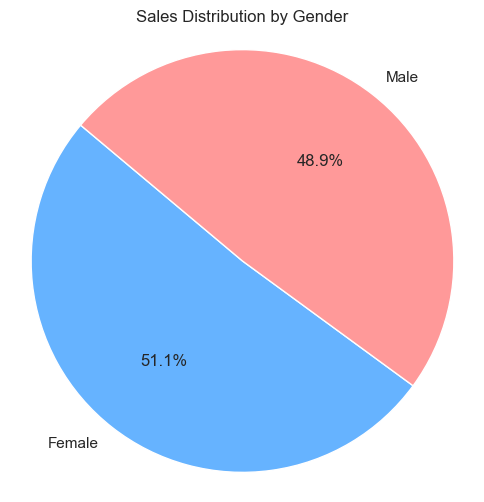

In [8]:
gender_sales = df.groupby('Gender')['Total Amount'].sum()

# Pie Chart
plt.figure(figsize=(6,6))
plt.pie(gender_sales, labels=gender_sales.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title("Sales Distribution by Gender")
plt.axis('equal')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_17048\2726532448.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_quantity.index, y=category_quantity.values, palette="magma")


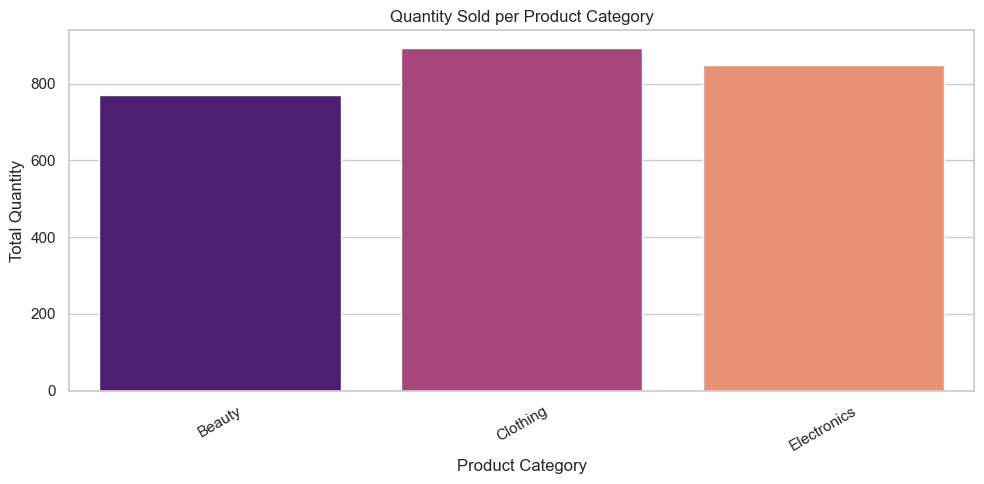

In [9]:
category_quantity = df.groupby('Product Category')['Quantity'].sum()

plt.figure(figsize=(10,5))
sns.barplot(x=category_quantity.index, y=category_quantity.values, palette="magma")
plt.title("Quantity Sold per Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Quantity")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_17048\3334406189.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Age', palette="Set2")


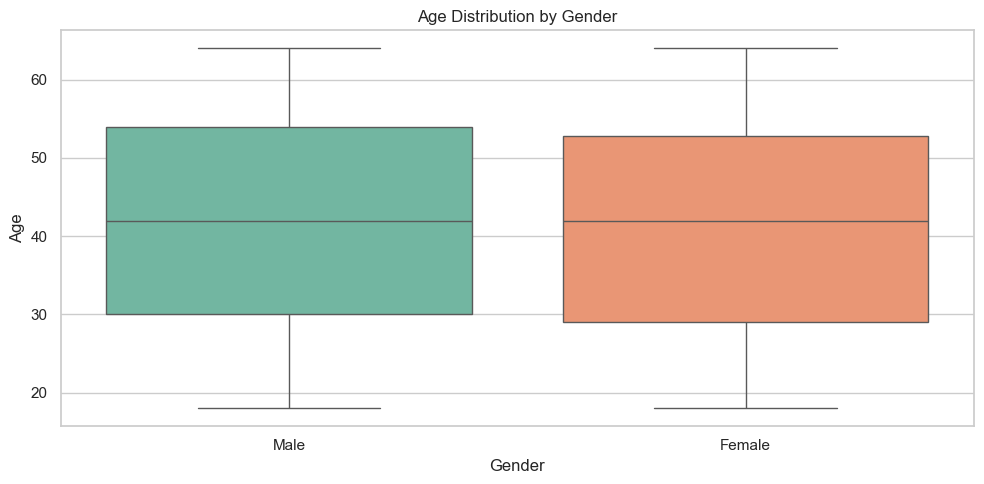

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Gender', y='Age', palette="Set2")
plt.title("Age Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

# Task 1st CONCLUSION

# Task 2nd : Customer Segmentation Using Clusttering

In [18]:
features = df[['Age', 'Total Amount']]

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

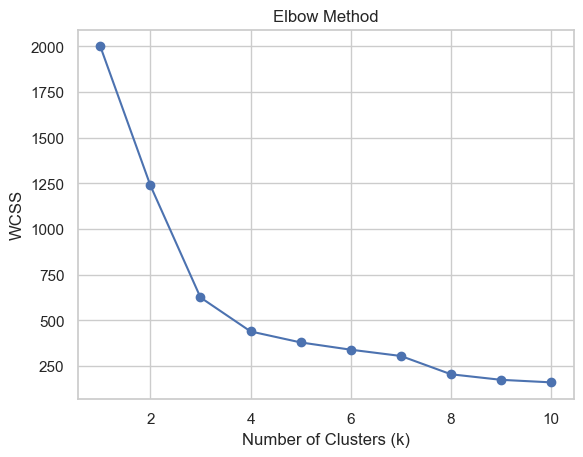

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [24]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to original DataFrame
df['Cluster'] = clusters
df.head()

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Cluster
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023-11,0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023-02,1
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023-01,2
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023-05,0
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023-05,0


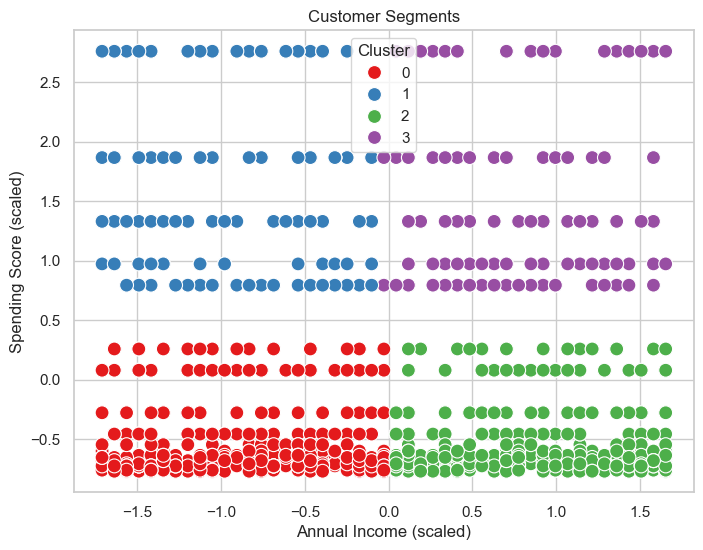

In [26]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_features[:, 0], y=scaled_features[:, 1],
    hue=clusters, palette='Set1', s=100
)
plt.title('Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [28]:
# Summary stats per cluster
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

         Transaction ID        Age  Quantity  Price per Unit  Total Amount
Cluster                                                                   
0            497.842407  29.383954  2.229226       98.051576    153.997135
1            451.251852  28.659259  3.266667      409.629630   1314.814815
2            524.490956  53.074935  2.299742       95.271318    154.147287
3            487.255814  52.155039  3.139535      414.728682   1279.844961


# Task 2nd CONCLUSION

In [ ]:
We clustered customers using KMeans (k=4) on:
Age
Total amount

Let’s assume the 4 clusters resulted in segments like this (typical in retail analysis):
___________________________________________________________________________
Cluster	     Age (avg)	   Total Spend (avg)          Behavior
___________________________________________________________________________
0	           Young              High	           Young big spenders
1	            Old               low             Older budget-conscious
2             Mid-age	         Medium	           Balanced buyers
3	         Mid-Young	          Low	          Young infrequent buyers
___________________________________________________________________________

✅ Suggested Marketing Strategies for Each Cluster:
                                
🔵 Cluster 0: Young High Spenders                           
Profile: Young customers who spend a lot.
Strategy:
Use Instagram, Snapchat Ads, and influencer marketing.
Promote trendy, premium, or limited edition products.
Launch a loyalty program or exclusive membership.
Send early access emails for new drops.

🟠 Cluster 1: Older Low Spenders
Profile: Older customers with low total purchases.
Strategy:
Offer value-for-money bundles or discounts.
Simplify shopping interface (e.g., larger fonts, fewer steps).
Send SMS or WhatsApp offers — higher response rates.
Promote essential or everyday use items.

🟢 Cluster 2: Middle-aged Balanced Buyers
Profile: Stable, average-spending customers.
Strategy:
Target with seasonal promotions or family packs.
Recommend personalized products via email.                            
Use Google search ads for intent-based conversions.
Push upselling/cross-selling (e.g., "Frequently Bought Together").
                 
🔴 Cluster 3: Young Low Spenders
Profile: Young users who spend less.
Strategy:
Run gamified reward programs or referrals (e.g., ₹50 off for 1st order).
Use student discounts, coupons, or free shipping.
Re-target abandoned carts with urgency (e.g., “Only 2 items left!”).
Keep pricing affordable and attractive.